# Machine Learning Project

We obtain a dataset related to the Delaney solubility benchmark, which is used in computational chemistry. The dataset consists of these key components:

**MolLogP**: Represents the octanol-water partition coefficient, a measure of a substance’s hydrophobicity.

**MolWt**: The molecular weight of the compounds.

**NumRotatableBonds**: Number of rotatable bonds, which can affect the flexibility of a molecule.

**AromaticProportion**: The proportion of a molecule that is aromatic, a type of stable ring-shaped molecule.

**logS**: The logarithm of a compound’s solubility in water, indicating how well it can dissolve.

This dataset is used to train a model to predict **logS**, or aqueous solubility, given the molecular descriptors, namely **MolLogP**, **MolWt**, **NumRotatableBonds**, and **AromaticProportion**. 

Solubility is a critical property in drug discovery and environmental science.

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load environment variables from .env file
load_dotenv()

# Access environment variables
dataset=os.environ.get('ml_1_dataset')

In [3]:
df = pd.read_csv(dataset)
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


## Data separation as x(features) & y(label)

In [5]:
# We want to predict 'logS', this is the label
y = df['logS']

In [6]:
# We use the other cells as features to make the prediction
x = df.drop('logS', axis=1)

## Data splitting

In [7]:
# Split the data into 80% for training, and 20% for testing the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [8]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 275 to 109
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             915 non-null    float64
 1   MolWt               915 non-null    float64
 2   NumRotatableBonds   915 non-null    float64
 3   AromaticProportion  915 non-null    float64
dtypes: float64(4)
memory usage: 35.7 KB
None


In [9]:
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 738 to 1000
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             229 non-null    float64
 1   MolWt               229 non-null    float64
 2   NumRotatableBonds   229 non-null    float64
 3   AromaticProportion  229 non-null    float64
dtypes: float64(4)
memory usage: 8.9 KB
None


## Linear Regression

### Train Model

In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Apply Model

In [11]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

### Evaluate Model Performance

In [12]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [13]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2']
print(lr_results)

              Method Train MSE  Test MSE  Train R2   Test R2
0  Linear Regression    1.0213  0.968745  0.778222  0.725713


## Random Forest

### Train Model

In [14]:
rf = RandomForestRegressor(max_depth=2, random_state=50)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=50)

### Apply Model

In [15]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluate Model Performance

In [16]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [17]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_test_mse, rf_train_r2, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2']
print(rf_results)

          Method Train MSE  Test MSE  Train R2  Test R2
0  Random Forest  1.088991  1.027562  0.763523  0.70906


## Model Comparison & Visualisation

In [18]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
print(df_models)

              Method Train MSE  Test MSE  Train R2   Test R2
0  Linear Regression    1.0213  0.968745  0.778222  0.725713
1      Random Forest  1.088991  1.027562  0.763523   0.70906


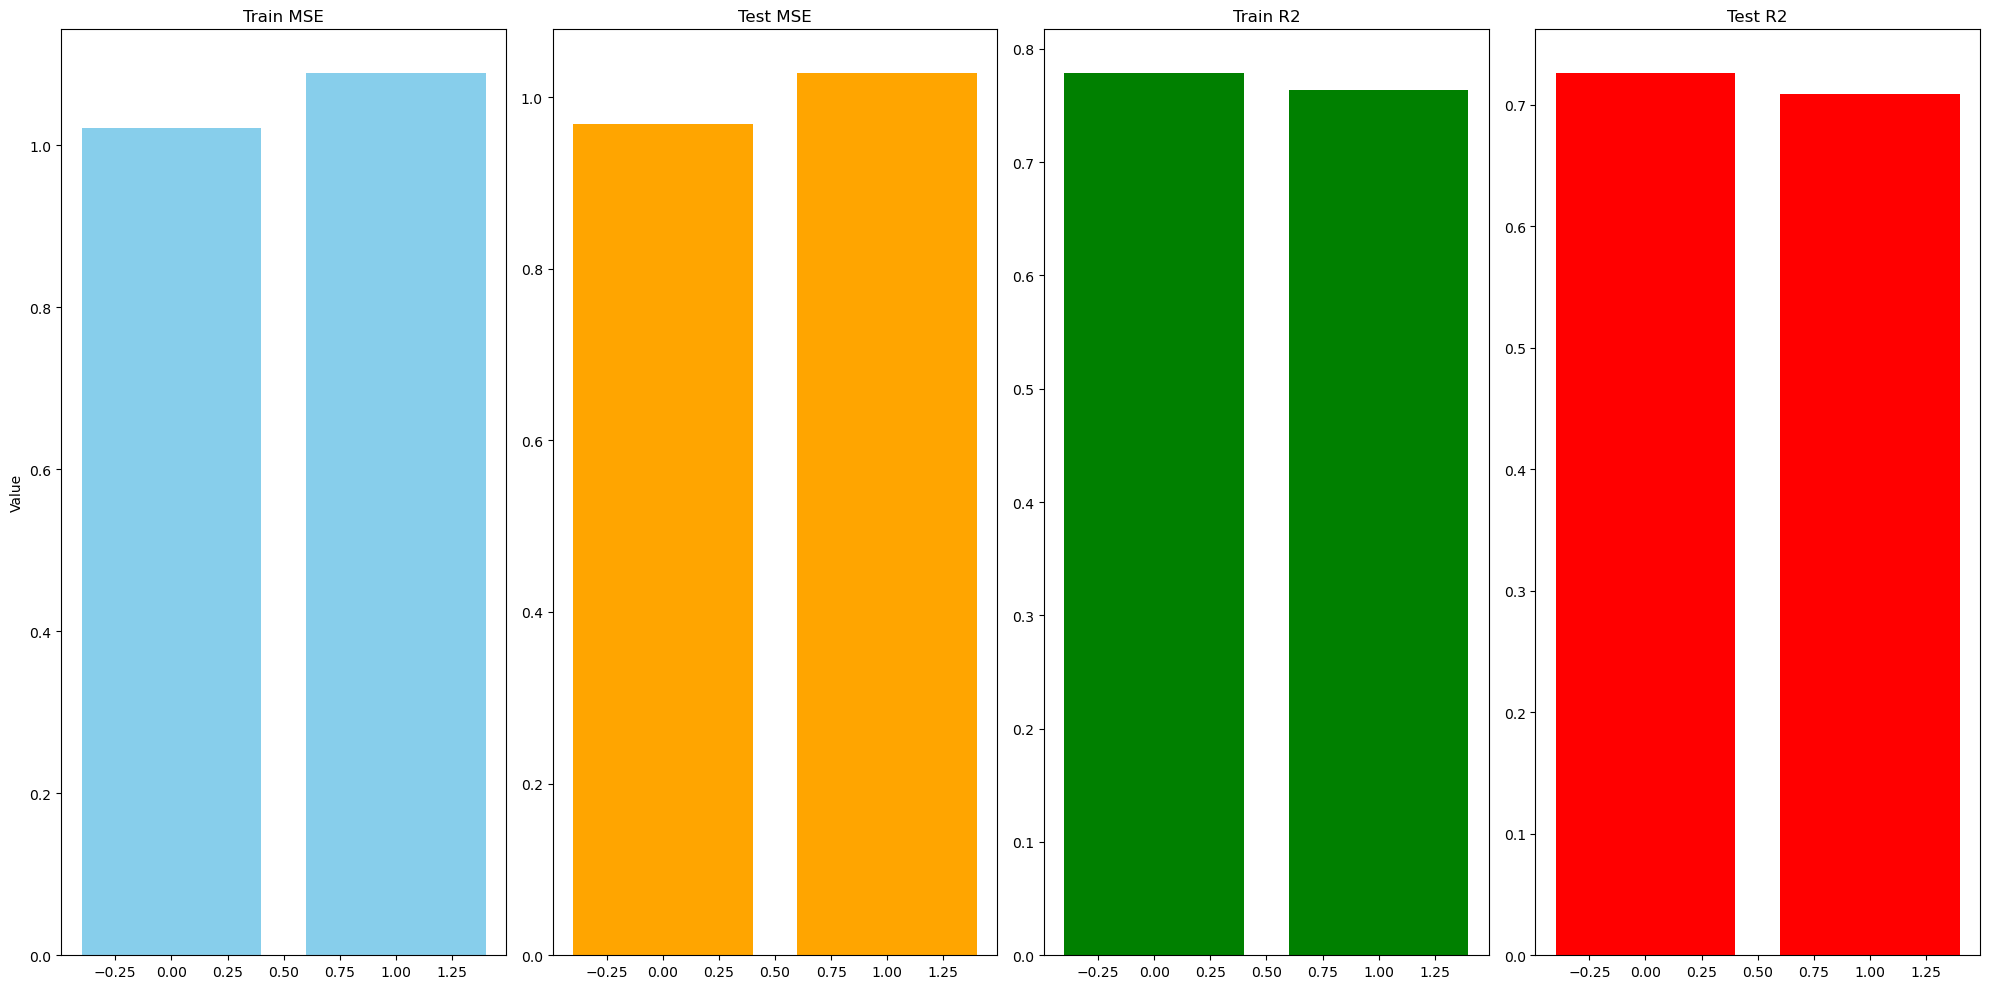

In [19]:
# Plotting comparison for each metric
fig, axs = plt.subplots(1, 4, figsize=(20, 10)) # 1 row, 4 columns

axs[0].bar(df_models.index, df_models['Train MSE'], color='skyblue')
axs[0].set_title('Train MSE')
axs[0].set_ylabel('Value')

axs[1].bar(df_models.index, df_models['Test MSE'], color='orange')
axs[1].set_title('Test MSE')

axs[2].bar(df_models.index, df_models['Train R2'], color='green')
axs[2].set_title('Train R2')

axs[3].bar(df_models.index, df_models['Test R2'], color='red')
axs[3].set_title('Test R2')

# Displaying the plot
plt.tight_layout()
plt.show()

# Choosing a Model

To decide which model produces better results, we consider both the **Mean Squared Error (MSE)** and the **R-squared (R2)** values:

**Mean Squared Error (MSE)**: A lower MSE value indicates a better fit of the model to the data. It measures the average squared difference between the observed actual outcomes and the outcomes predicted by the model.

**R-squared (R2)**: Represents the proportion of variance in the dependent variable that is predictable from the independent variables. An R2 value closer to 1 indicates a better fit of the model.
For both metrics, you typically look for lower MSE and higher R2 values.

Based on the results:

The **Linear Regression** model has a slightly lower Test & Train MSE and higher Test & Train R2 compared to the Random Forest model, indicating it may generalize better to unseen data.

However, the differences are not very large, so IRL it might also be worth considering other factors such as training time, complexity of the model, and interpretability.

## More Visuals to check our results:

<function matplotlib.pyplot.show(close=None, block=None)>

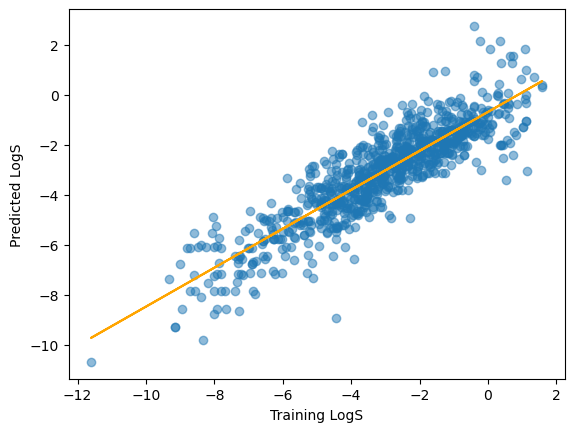

In [20]:
# Linear Regression
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.5)
plt.xlabel('Training LogS')
plt.ylabel('Predicted LogS')

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'Orange')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

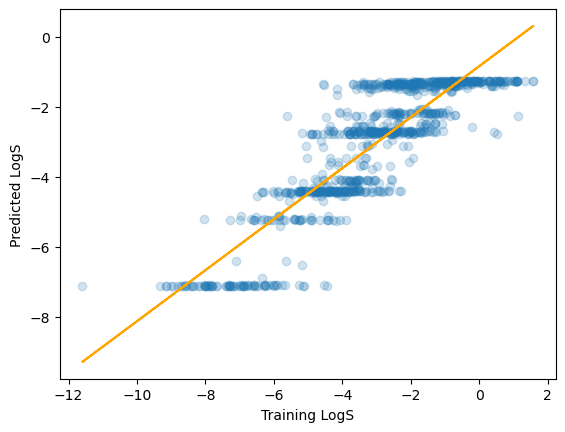

In [21]:
plt.scatter(x=y_train, y=y_rf_train_pred, alpha=0.2)
plt.xlabel('Training LogS')
plt.ylabel('Predicted LogS')

z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'Orange')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

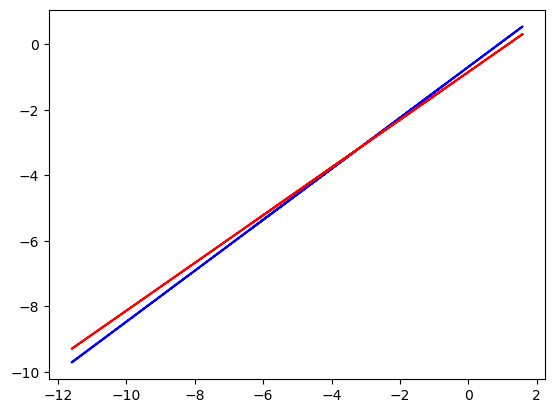

In [22]:
z_lr = np.polyfit(y_train, y_lr_train_pred, 1)
p_lr = np.poly1d(z_lr)

plt.plot(y_train, p_lr(y_train), 'Blue')

z_rf = np.polyfit(y_train, y_rf_train_pred, 1)
p_rf = np.poly1d(z_rf)

plt.plot(y_train, p_rf(y_train), 'Red')

plt.show